In [4]:
import sys
import numpy
import pandas
import matplotlib
import sklearn

print("Python: {}".format(sys.version))
print("Numpy: {}".format(numpy.__version__))
print("Pandas: {}".format(pandas.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("sklearn: {}".format(sklearn.__version__))

Python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Numpy: 1.17.5
Pandas: 0.25.3
matplotlib: 3.1.2
sklearn: 0.22.1


In [0]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [0]:
#Loading the dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=["id", "clump_thickness", "uniform_cell_size", "uniform_cell_shape", 
       "marginal_adhesion", "single_epithelial_size", "bare_nuclei",
       "bland_chromatin", "normal_nucleoli","mitoses","class"]
df=pd.read_csv(url, names=names)

In [17]:
#Preprocessing
df.replace("?", -99999, inplace=True)
print(df.axes)

df.drop(["id"], 1, inplace=True)

#Print the shape
df.shape

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


(699, 10)

In [26]:
print(df.loc[0])

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object


In [27]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


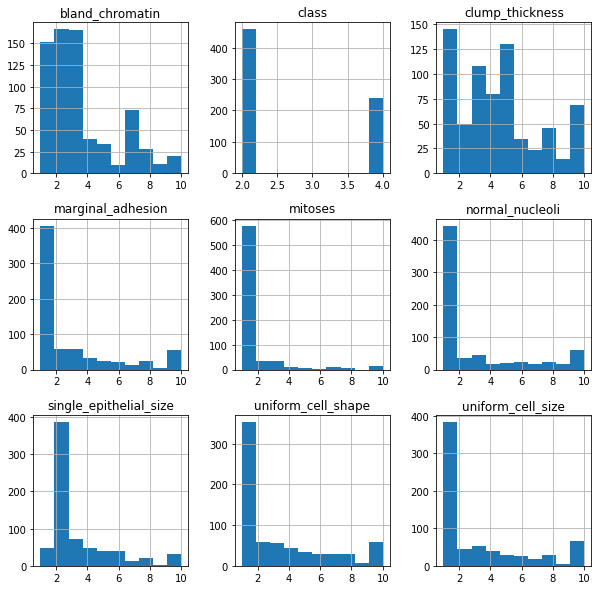

In [28]:
#Visualization 
#plot histograms for each variable

df.hist(figsize=(10,10))
plt.show()

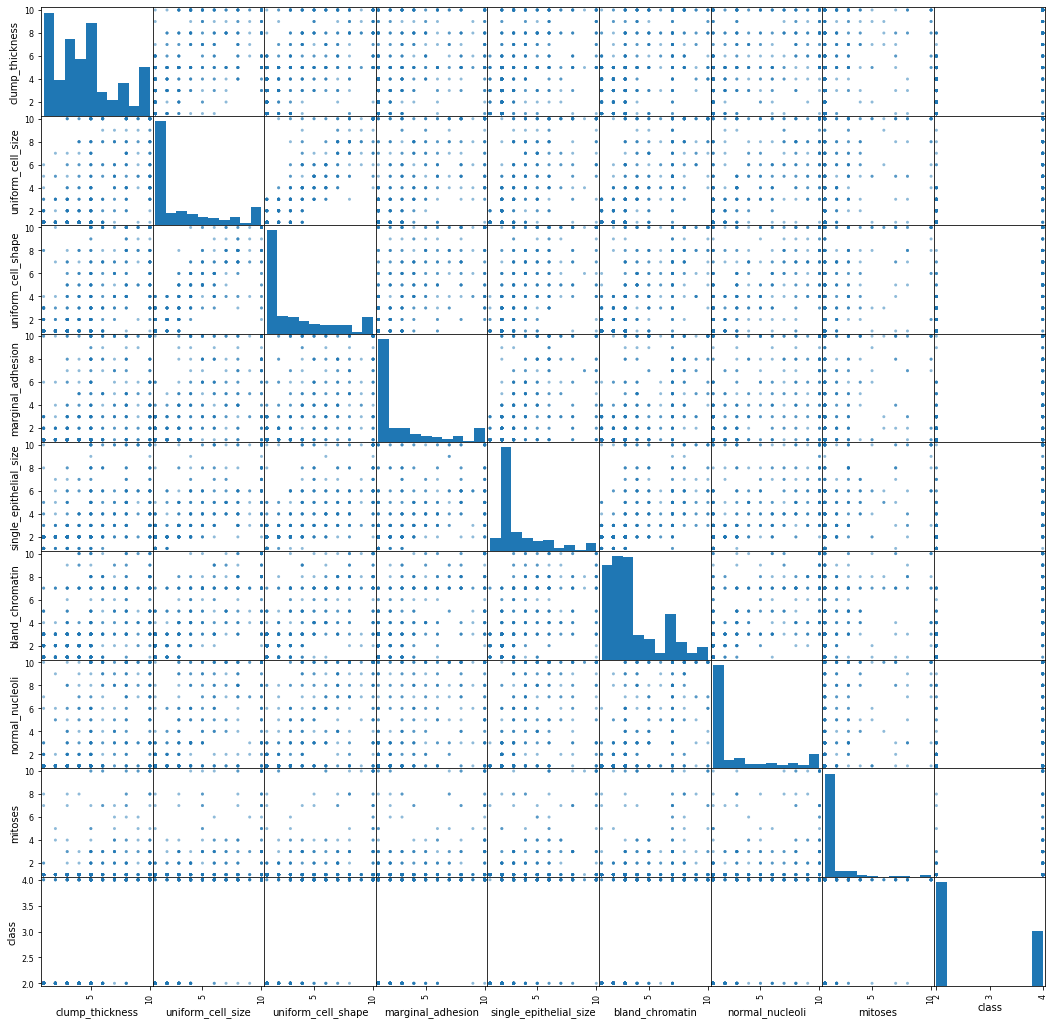

In [29]:
# Create scatter plot
scatter_matrix(df, figsize=(18,18))
plt.show()

In [0]:
#Split the dataset into train and test set 
X=np.array(df.drop(['class'], 1))
y=np.array(df["class"])

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [0]:
#specify testing options 
seed=8
scoring="accuracy"

In [55]:
# Define the models
models=[]
models.append(("KNN", KNeighborsClassifier(n_neighbors=5)))
models.append(("SVM", SVC()))

#Evaluate each model in turn
results = []
names=[]

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)"% (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.969610 (0.028835)
SVM: 0.665649 (0.050965)


In [62]:
#make predictions on validation data set
for name, model in models:
  model.fit(X_train, y_train)
  predictions=model.predict(X_test)
  print(name)
  print(accuracy_score(y_test, predictions))
  print(classification_report(y_test, predictions))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        92
           4       0.96      0.98      0.97        48

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
0.6571428571428571
              precision    recall  f1-score   support

           2       0.66      1.00      0.79        92
           4       0.00      0.00      0.00        48

    accuracy                           0.66       140
   macro avg       0.33      0.50      0.40       140
weighted avg       0.43      0.66      0.52       140



In [65]:
clf = SVC()
clf.fit(X_train, y_train)
accuracy=clf.score(X_test, y_test)
print(accuracy)

example=np.array([[4,2,1,1,1,2,3,2,1]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.6571428571428571
[2]
